# Завершение кода

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Загружаем датасет и посмотрим на названия столбцов

In [2]:
df = pd.read_csv(r"C:\Users\aleks\Itog.CSV")
df.shape

(1023, 14)

Посмотрим на первые 5 строк датасета

In [3]:
df.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


Прогнозируем модуль упругости при растяжении, ГПа

разбиваем на тестовую, тренировочную выборки, выделяя предикторы и целевые переменные

In [4]:
normalizer = Normalizer()
res = normalizer.fit_transform(df)
df_norm_n = pd.DataFrame(res, columns = df.columns)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
 df_norm_n.loc[:, df_norm_n.columns != 'Модуль упругости при растяжении, ГПа'],
 df[['Модуль упругости при растяжении, ГПа']],
 test_size = 0.3,
 random_state = 42)

Проверка правильности разбивки

In [5]:
df_norm_n.shape[0] - x_train_2.shape[0] - x_test_2.shape[0]

0

In [6]:
x_train_2.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
604,0.245570,0.001455,0.757315,0.138915,0.030521,0.010553,0.127172,0.003678,0.568844,0.065263,0.000407,0.004173,0.029980
227,0.083378,0.001075,0.736859,0.349166,0.056810,0.008882,0.108405,0.260829,0.491360,0.052345,0.000000,0.002433,0.015924
970,0.288297,0.000678,0.578518,0.299715,0.045083,0.006915,0.087178,0.083826,0.686335,0.062721,0.000297,0.001343,0.014345
497,0.146251,0.000888,0.611868,0.330203,0.031071,0.007410,0.079025,0.086214,0.690685,0.049106,0.000000,0.000215,0.024723
919,0.298448,0.000659,0.636730,0.296967,0.038845,0.007575,0.073767,0.028011,0.638649,0.024689,0.000325,0.002151,0.021745


In [7]:
y_train_2

,"Модуль упругости при растяжении, ГПа"
604,73.006935
227,69.215144
970,72.762976
497,70.199234
919,72.951915
...,...
106,68.166534
270,71.761063
860,72.558812
435,70.643900


In [8]:
y_train_2.shape

(716, 1)

Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке

In [9]:
def mean_model(y_test_2):
    return [np.mean(y_test_2) for _ in range(len(y_test_2))]
y_2_pred_mean = mean_model(y_test_2)

Проверка различных моделей при стандартных параметрах.
Метод опорных векторов - 1

In [10]:
svr2 = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))

обучаем модель

вычисляем коэффициент детерминации

In [11]:
svr2.fit(x_train_2, np.ravel(y_train_2))
y_pred_svr2 = svr2.predict(x_test_2)
mae_svr2 = mean_absolute_error(y_pred_svr2, y_test_2)
mse_svr_elast2 = mean_squared_error(y_test_2,y_pred_svr2)
print('Support Vector Regression Results Train:')
print("Test score: {:.2f}".format(svr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('Support Vector Regression Results:')
print('SVR_MAE:', round(mean_absolute_error(y_test_2, y_pred_svr2)))
print('SVR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_svr2)))
print('SVR_MSE: {:.2f}'.format(mse_svr_elast2))
print("SVR_RMSE: {:.2f}".format (np.sqrt(mse_svr_elast2)))
print("Test score: {:.2f}".format(svr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки

Support Vector Regression Results Train:
Test score: 0.91
Support Vector Regression Results:
SVR_MAE: 4
SVR_MAPE: 0.05
SVR_MSE: 20.15
SVR_RMSE: 4.49
Test score: -1.03


Результаты модели, выдающей среднее значение

In [12]:
mse_lin_elast2_mean = mean_squared_error(y_test_2, y_2_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y_test_2, y_2_pred_mean))
print("MSE for mean target: ", mse_lin_elast2_mean)
print("RMSE for mean target: ", np.sqrt(mse_lin_elast2_mean))

MAE for mean target:  2.5313035448559824
MSE for mean target:  9.934422413841746
RMSE for mean target:  3.1518918785138785


Визуализируем

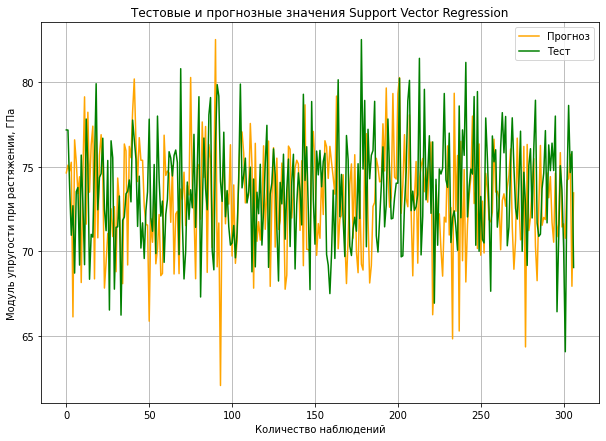

In [13]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr2, label = "Прогноз", color = "orange")
plt.plot(y_test_2.values, label = "Тест", color = "green")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Метод случайного леса - Random Forest Regressor - 2

Построение модели и вузуализация метода случайный лес

In [14]:
rfr2 = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr2.fit(x_train_2, y_train_2.values)
y2_pred_forest = rfr2.predict(x_test_2)
mae_rfr2 = mean_absolute_error(y2_pred_forest, y_test_2)
mse_rfr_elast2 = mean_squared_error(y_test_2,y2_pred_forest)
print('Random Forest Regressor Results Train:')
print("Test score: {:.2f}".format(rfr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(mean_absolute_error(y_test_2, y2_pred_forest)))
print('RF_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y2_pred_forest)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast2))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast2)))
print("Test score: {:.2f}".format(rfr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки

Random Forest Regressor Results Train:
Test score: 0.37
Random Forest Regressor Results:
RF_MAE:  3
RF_MAPE: 0.04
RF_MSE: 10.71
RF_RMSE: 3.27
Test score: -0.08


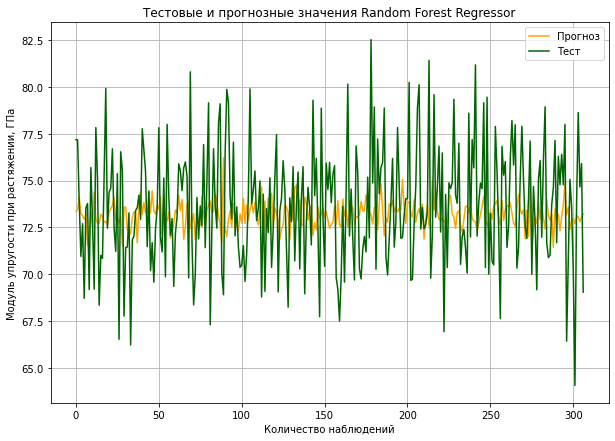

In [15]:
plt.figure(figsize=(10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y2_pred_forest, label = "Прогноз", color = "orange")
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Метод линейной регрессии - Linear Regression - 3

Построение модели и вузуализация Линейной регрессии

In [16]:
lr2 = LinearRegression()
lr2.fit(x_train_2, y_train_2)
y_pred_lr2 = lr2.predict(x_test_2)
mae_lr2 = mean_absolute_error(y_pred_lr2, y_test_2)
mse_lin_elast2 = mean_squared_error(y_test_2, y_pred_lr2)
print('Linear Regression Results Train:') # Скор для тренировочной выборки
print("Test score: {:.2f}".format(lr2.score(x_train_2, y_train_2)))
print('Linear Regression Results:') 
print('lr_MAE: ', round(mean_absolute_error(y_test_2, y_pred_lr2)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_lr2)))
print('lr_MSE: {:.2f}'.format(mse_lin_elast2))
print("lr_RMSE: {:.2f}".format (np.sqrt(mse_lin_elast2)))
print("Test score: {:.2f}".format(lr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки

Linear Regression Results Train:
Test score: 0.02
Linear Regression Results:
lr_MAE:  3
lr_MAPE: 0.03
lr_MSE: 10.15
lr_RMSE: 3.19
Test score: -0.02


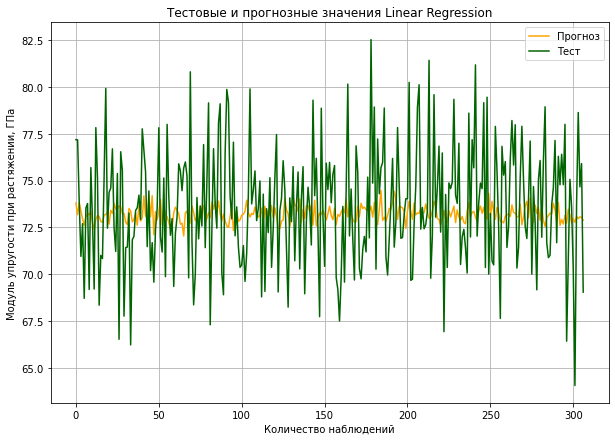

In [17]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

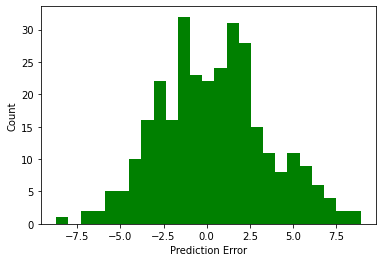

In [18]:
error = y_test_2 - y_pred_lr2
plt.hist(error, bins = 25, color = "g")
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [19]:
gbr2 = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr2.fit(x_train_2, np.ravel(y_train_2))
y_pred_gbr2 = gbr2.predict(x_test_2)
mae_gbr2 = mean_absolute_error(y_pred_gbr2, y_test_2)
mse_gbr_elast2 = mean_squared_error(y_test_2,y_pred_gbr2)
print('Gradient Boosting Regressor Results Train:')
print("Test score: {:.2f}".format(gbr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('Gradient Boosting Regressor Results:')
print('GBR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_gbr2)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_gbr2)))
print('GBR_MSE: {:.2f}'.format(mse_gbr_elast2))
print("GBR_RMSE: {:.2f}".format (np.sqrt(mse_gbr_elast2)))
print("Test score: {:.2f}".format(gbr2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Gradient Boosting Regressor Results Train:
Test score: 0.52
Gradient Boosting Regressor Results:
GBR_MAE:  3
GBR_MAPE: 0.04
GBR_MSE: 10.85
GBR_RMSE: 3.29
Test score: -0.09


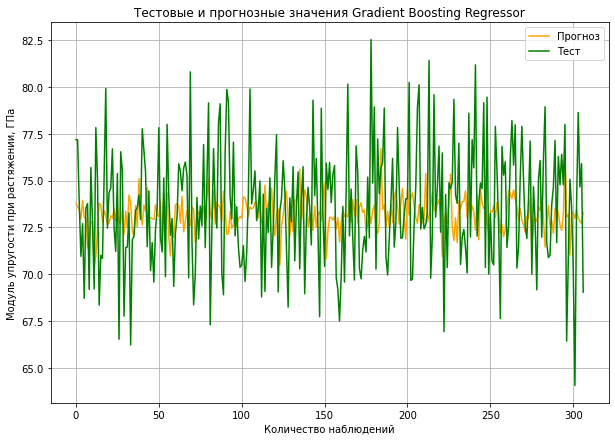

In [20]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr2, label = "Прогноз", color = "orange")
plt.plot(y_test_2.values, label = "Тест", color = "green")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Метод К ближайших соседей - K Neighbors Regressor - 5

In [21]:
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(x_train_2, y_train_2)
y_pred_knn2 = knn2.predict(x_test_2)
mae_knr2 = mean_absolute_error(y_pred_knn2, y_test_2)
mse_knn_elast2 = mean_squared_error(y_test_2,y_pred_knn2)
print('K Neighbors Regressor Results Train:')
print("Test score: {:.2f}".format(knn2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('K Neighbors Regressor Results:')
print('KNN_MAE: ', round(mean_absolute_error(y_test_2, y_pred_knn2)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_knn2)))
print('KNN_MSE: {:.2f}'.format(mse_knn_elast2))
print("KNN_RMSE: {:.2f}".format (np.sqrt(mse_knn_elast2)))
print("Test score: {:.2f}".format(knn2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

K Neighbors Regressor Results Train:
Test score: 0.20
K Neighbors Regressor Results:
KNN_MAE:  3
KNN_MAPE: 0.04
KNN_MSE: 11.60
KNN_RMSE: 3.41
Test score: -0.17


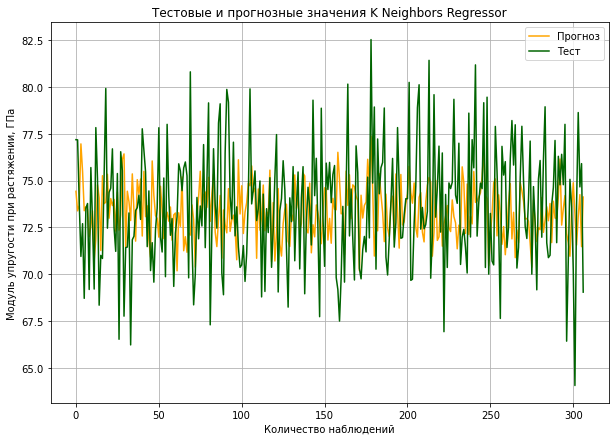

In [22]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knn2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Визуализация гистограммы распределения ошибки

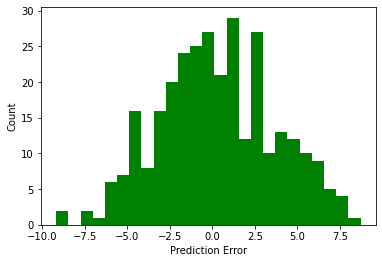

In [23]:
error = y_test_2 - y_pred_knn2
plt.hist(error, bins = 25, color = "g")
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

Деревья решений - Decision Tree Regressor - 6

In [24]:
dtr2 = DecisionTreeRegressor()
dtr2.fit(x_train_2, y_train_2.values)
y_pred_dtr2 = dtr2.predict(x_test_2)
mae_dtr2 = mean_absolute_error(y_pred_dtr2, y_test_2)
mse_dtr_elast2 = mean_squared_error(y_test_2,y_pred_dtr2)
print('Decision Tree Regressor Results Train:')
print("Test score: {:.2f}".format(dtr2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Decision Tree Regressor Results:')
print('DTR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_dtr2)))
print('DTR_MSE: {:.2f}'.format(mse_dtr_elast2))
print("DTR_RMSE: {:.2f}".format (np.sqrt(mse_dtr_elast2)))
print('DTR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_dtr2)))
print("Test score: {:.2f}".format(dtr2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Decision Tree Regressor Results Train:
Test score: 1.00
Decision Tree Regressor Results:
DTR_MAE:  3
DTR_MSE: 15.93
DTR_RMSE: 3.99
DTR_MAPE: 0.04
Test score: -0.60


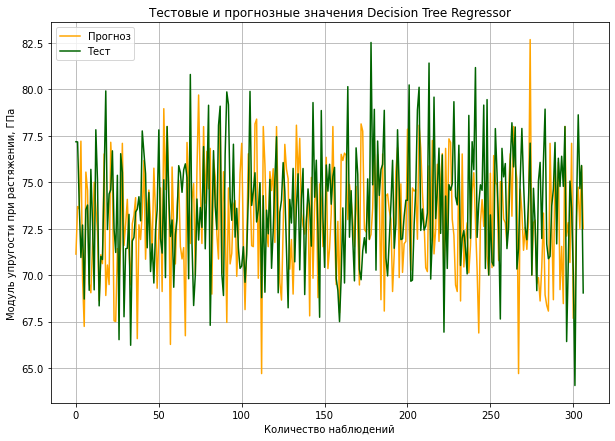

In [25]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_dtr2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Стохастический градиентный спуск (SGD) - Stochastic Gradient Descent Regressor - 7 

In [26]:
sdg2 = SGDRegressor()
sdg2.fit(x_train_2, y_train_2)
y_pred_sdg2 = sdg2.predict(x_test_2)
mae_sdg2 = mean_absolute_error(y_pred_sdg2, y_test_2)
mse_sdg_elast2 = mean_squared_error(y_test_2,y_pred_sdg2)
print('Stochastic Gradient Descent Regressor Results Train:')
print("Test score: {:.2f}".format(sdg2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Stochastic Gradient Descent Regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_sdg2)))
print('SGD_MSE: {:.2f}'.format(mse_sdg_elast2))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_sdg_elast2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_sdg2)))
print("Test score: {:.2f}".format(sdg2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Stochastic Gradient Descent Regressor Results Train:
Test score: -0.02
Stochastic Gradient Descent Regressor Results:
SGD_MAE:  3
SGD_MSE: 10.41
SGD_RMSE: 3.23
SGD_MAPE: 0.03
Test score: -0.05


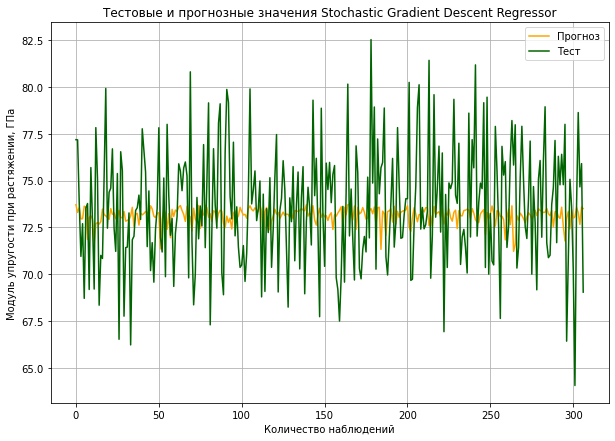

In [27]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Stochastic Gradient Descent Regressor")
plt.plot(y_pred_sdg2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Многослойный перцептрон - Multi-layer Perceptron regressor - 8

In [28]:
mlp2 = MLPRegressor(random_state = 1, max_iter = 500)
mlp2.fit(x_train_2, y_train_2)
y_pred_mlp2 = mlp2.predict(x_test_2)
mae_mlp2 = mean_absolute_error(y_pred_mlp2, y_test_2)
mse_mlp_elast2 = mean_squared_error(y_test_2,y_pred_mlp2)
print('Multi-layer Perceptron regressor Results Train:')
print("Test score: {:.2f}".format(mlp2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Multi-layer Perceptron regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_mlp2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_mlp2)))
print('SGD_MSE: {:.2f}'.format(mse_mlp_elast2))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_mlp_elast2)))
print("Test score: {:.2f}".format(mlp2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Multi-layer Perceptron regressor Results Train:
Test score: -0.52
Multi-layer Perceptron regressor Results:
SGD_MAE:  3
SGD_MAPE: 0.04
SGD_MSE: 14.49
SGD_RMSE: 3.81
Test score: -0.46


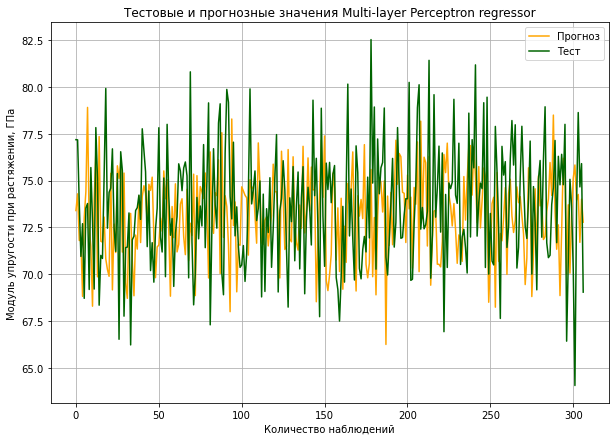

In [29]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Multi-layer Perceptron regressor")
plt.plot(y_pred_mlp2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Лассо регрессия - the Lasso - 9

In [30]:
clf2 = linear_model.Lasso(alpha = 0.1)
clf2.fit(x_train_2, y_train_2)
y_pred_clf2 = clf2.predict(x_test_2)
mae_clf2 = mean_absolute_error(y_pred_clf2, y_test_2)
mse_clf_elast2 = mean_squared_error(y_test_2,y_pred_clf2)
print('Lasso regressor Results Train:')
print("Test score: {:.2f}".format(clf2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Lasso regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_clf2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_clf2)))
print('SGD_MSE: {:.2f}'.format(mse_clf_elast2))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_clf_elast2)))
print("Test score: {:.2f}".format(clf2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Lasso regressor Results Train:
Test score: 0.00
Lasso regressor Results:
SGD_MAE:  3
SGD_MAPE: 0.03
SGD_MSE: 10.10
SGD_RMSE: 3.18
Test score: -0.02


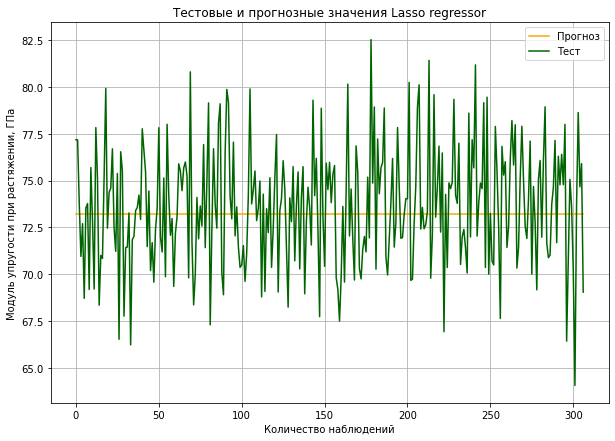

In [31]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Lasso regressor")
plt.plot(y_pred_clf2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

сравним наши модели по метрике МАЕ

In [32]:
mae_df2 = {'Регрессор': ['Support Vector', 'RandomForest', 'Linear Regression', 'GradientBoosting', 'KNeighbors', 'DecisionTree', 'SGD', 'MLP', 'Lasso'], 'MAE': [mae_svr2, mae_rfr2, mae_lr2, mae_gbr2, mae_knr2, mae_dtr2, mae_sdg2, mae_mlp2, mae_clf2]}
mae_df2 = pd.DataFrame(mae_df2)

Проведем поиск по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
модели случайного леса - Random Forest Regressor - 2

In [33]:
parametrs = { 'n_estimators': [200, 300],
 'max_depth': [9, 15],
 'max_features': ['auto'],
 'criterion': ['mse'] }
grid21 = GridSearchCV(estimator = rfr2, param_grid = parametrs, cv=10)
grid21.fit(x_train_2, y_train_2)
grid21.best_params_

{'criterion': 'mse',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 200}

Выводим гиперпараметры для оптимальной модели

In [34]:
print(grid21.best_estimator_)
knr_u = grid21.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {knr_u.score(x_test_2, y_test_2).round(3)}')

RandomForestRegressor(criterion='mse', max_depth=9, max_features='auto',
                      n_estimators=200, random_state=33)
R2-score RFR для модуля упругости при растяжении: -0.031


Подставим оптимальные гиперпараметры в нашу модель случайного леса

In [35]:
rfr21_grid = RandomForestRegressor(n_estimators=200, criterion='mse', max_depth=15, max_features='auto')

Обучаем модель

In [36]:
rfr21_grid.fit(x_train_2, y_train_2)
predictions_rfr21_grid = rfr21_grid.predict(x_test_2)

Оцениваем точность на тестовом наборе

In [37]:
mae_rfr21_grid = mean_absolute_error(predictions_rfr21_grid, y_test_2)
mae_rfr21_grid

2.602156988525706

In [38]:
new_row_in_mae_df = {'Регрессор': 'RandomForest1_GridSearchCV', 'MAE': mae_rfr21_grid}
mae_df = mae_df2.append(new_row_in_mae_df, ignore_index = True)

In [39]:
mae_df

,Регрессор,MAE
0,Support Vector,3.644755
1,RandomForest,2.642131
2,Linear Regression,2.562017
3,GradientBoosting,2.666098
4,KNeighbors,2.743858
5,DecisionTree,3.105267
6,SGD,2.586755
7,MLP,3.061175
8,Lasso,2.556417
9,RandomForest1_GridSearchCV,2.602157


Проведем поиск по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
Метода К ближайших соседей - K Neighbors Regressor - 5

In [40]:
knn21 = KNeighborsRegressor()
knn21_params = {'n_neighbors' : range(1, 301, 2),
 'weights' : ['uniform', 'distance'],
 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
 }

Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.

In [41]:
gs21 = GridSearchCV(knn21, knn21_params, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(x_train_2, y_train_2)
knn_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 299, 'weights': 'uniform'}

Выводим гиперпараметры для оптимальной модели

In [42]:
print(gs21.best_estimator_)
gs121 = gs21.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {gs121.score(x_test_2, y_test_2).round(3)}')

KNeighborsRegressor(n_neighbors=299)
R2-score KNR для модуля упругости при растяжении: -0.019


Подставим оптимальные гиперпараметры в нашу модель метода к ближайших соседей

In [43]:
knn21_grid = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 7, weights = 'distance')

Обучаем модель

In [44]:
knn21_grid.fit(x_train_2, y_train_2)
predictions_knn21_grid = knn21_grid.predict(x_test_2)

Оцениваем точность на тестовом наборе

In [45]:
mae_knn21_grid = mean_absolute_error(predictions_knn21_grid, y_test_2)
mae_knn21_grid

2.687507823900731

In [46]:
new_row_in_mae_df = {'Регрессор': 'KNeighbors1_GridSearchCV', 'MAE': mae_knn21_grid}
mae_df = mae_df.append(new_row_in_mae_df, ignore_index=True)
mae_df

,Регрессор,MAE
0,Support Vector,3.644755
1,RandomForest,2.642131
2,Linear Regression,2.562017
3,GradientBoosting,2.666098
4,KNeighbors,2.743858
5,DecisionTree,3.105267
6,SGD,2.586755
7,MLP,3.061175
8,Lasso,2.556417
9,RandomForest1_GridSearchCV,2.602157


Проведем поиск по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
Деревья решений - Decision Tree Regressor - 6

In [47]:
criterion21 = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter21 = ['best', 'random']
max_depth21 = [3,5,7,9,11]
min_samples_leaf21 = [100,150,200]
min_samples_split21 = [200,250,300]
max_features21 = ['auto', 'sqrt', 'log2']
param_grid21 = {'criterion': criterion21,
                'splitter': splitter21,
                'max_depth': max_depth21,
                'min_samples_split': min_samples_split21,
                'min_samples_leaf': min_samples_leaf21,
                'max_features': max_features21}

Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.

In [48]:
gs21 = GridSearchCV(dtr2, param_grid21, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(x_train_2, y_train_2)
dtr_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 100,
 'min_samples_split': 300,
 'splitter': 'random'}

Выводим гиперпараметры для оптимальной модели

In [49]:
print(gs21.best_estimator_)
gs21 = gs21.best_estimator_
print(f'R2-score DTR для модуля упругости при растяжении: {gs21.score(x_test_2, y_test_2).round(3)}')

DecisionTreeRegressor(max_depth=9, max_features='log2', min_samples_leaf=100,
                      min_samples_split=300, splitter='random')
R2-score DTR для модуля упругости при растяжении: -0.013


подставим оптимальные гиперпараметры в нашу модель метода деревья решений

In [50]:
dtr21_grid = DecisionTreeRegressor(criterion='poisson', max_depth=7, max_features='auto',
                        min_samples_leaf=100, min_samples_split=250)

Обучаем модель

In [51]:
dtr21_grid.fit(x_train_2, y_train_2)
predictions_dtr21_grid = dtr21_grid.predict(x_test_2)

Оцениваем точность на тестовом наборе

In [52]:
mae_dtr21_grid = mean_absolute_error(predictions_dtr21_grid, y_test_2)
mae_dtr21_grid

2.5666119064721684

In [53]:
new_row_in_mae_df = {'Регрессор': 'DecisionTree1_GridSearchCV', 'MAE': mae_dtr21_grid}
mae_df = mae_df.append(new_row_in_mae_df, ignore_index=True)
mae_df

,Регрессор,MAE
0,Support Vector,3.644755
1,RandomForest,2.642131
2,Linear Regression,2.562017
3,GradientBoosting,2.666098
4,KNeighbors,2.743858
5,DecisionTree,3.105267
6,SGD,2.586755
7,MLP,3.061175
8,Lasso,2.556417
9,RandomForest1_GridSearchCV,2.602157


In [54]:
pipe2 = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid2 = [
{'regressor': [SVR()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None],
'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'regressor': [RandomForestRegressor(n_estimators=100)],
'preprocessing': [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [DecisionTreeRegressor()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [SGDRegressor()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [MLPRegressor(random_state=1, max_iter=500)], 'preprocessing': [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [linear_model.Lasso(alpha=0.1)], 'preprocessing': [StandardScaler(), MinMaxScaler(), None]},]
grid2 = GridSearchCV(pipe2, param_grid2, cv=10)
grid2.fit(x_train_2, np.ravel(y_train_2))
print("Наилучшие параметры:\n{}\n".format(grid2.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid2.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid2.score(x_test_2, y_test_2)))

Наилучшие параметры:
{'preprocessing': StandardScaler(), 'regressor': SVR(C=1, gamma=1), 'regressor__C': 1, 'regressor__gamma': 1}

Наилучшее значение правильности перекрестной проверки: -0.02
Правильность на тестовом наборе: -0.02


In [55]:
print("Наилучшая модель:\n{}".format(grid2.best_estimator_))

Наилучшая модель:
Pipeline(steps=[('preprocessing', StandardScaler()),
                ('regressor', SVR(C=1, gamma=1))])


После обучения моделей была проведена оценка точности этих моделей на обучающей и тестовых выборках.
В качестве параметра оценки модели использовалась средняя абсолютная ошибка (MAE).
Обе модели даже на тренировочном датасете не смогли обучиться и приблизиться к исходным данным.
Поэтому ошибка на тестовом датасете выше

# Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель

Сформируем входы и выход для модели

In [56]:
tv = df['Соотношение матрица-наполнитель']
tr_v = df.loc[:, df.columns != 'Соотношение матрица-наполнитель']

Разбиваем выборки на обучающую и тестовую

In [57]:
x_train, x_test, y_train, y_test = train_test_split(tr_v, tv, test_size = 0.3, random_state = 14)

Нормализуем данные

In [58]:
x_train_n = tf.keras.layers.Normalization(axis =-1)
x_train_n.adapt(np.array(x_train))

In [59]:
def create_model(lyrs=[32], act='softmax', opt='SGD', dr=0.1):
 
    seed = 7
    np.random.seed(seed)
    tf.random.set_seed(seed)
 
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=x_train.shape[1], activation=act))
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
 
    model.add(Dropout(dr))
    model.add(Dense(3, activation='tanh')) # выходной слой
 
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['mae', 'accuracy'])
    return model

строим модель

In [60]:
model = KerasClassifier(build_fn=create_model, verbose=0)

определяем параметры

In [61]:
batch_size = [4, 10, 20, 50, 100]
epochs = [10, 50, 100, 200, 300]
param_grid = dict(batch_size=batch_size, epochs=epochs)

поиск оптимальных параметров

In [62]:
grid = GridSearchCV(estimator=model,
 param_grid=param_grid,
 cv=10,
 verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


результаты

In [63]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.002797 using {'batch_size': 10, 'epochs': 100}
0.000000 (0.000000) with: {'batch_size': 4, 'epochs': 10}
0.001389 (0.004167) with: {'batch_size': 4, 'epochs': 50}
0.000000 (0.000000) with: {'batch_size': 4, 'epochs': 100}
0.001389 (0.004167) with: {'batch_size': 4, 'epochs': 200}
0.001389 (0.004167) with: {'batch_size': 4, 'epochs': 300}
0.001389 (0.004167) with: {'batch_size': 10, 'epochs': 10}
0.000000 (0.000000) with: {'batch_size': 10, 'epochs': 50}
0.002797 (0.005595) with: {'batch_size': 10, 'epochs': 100}
0.001389 (0.004167) with: {'batch_size': 10, 'epochs': 200}
0.001389 (0.004167) with: {'batch_size': 10, 'epochs': 300}
0.001389 (0.004167) with: {'batch_size': 20, 'epochs': 10}
0.001389 (0.004167) with: {'batch_size': 20, 'epochs': 50}
0.001389 (0.004167) with: {'batch_size': 20, 'epochs': 100}
0.001389 (0.004167) with: {'batch_size': 20, 'epochs': 200}
0.001389 (0.004167) with: {'batch_size': 20, 'epochs': 300}
0.000000 (0.000000) with: {'batch_size': 50, 'epochs': 1

In [64]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ............................................opt=SGD; total time=   9.1s
[CV] END ............................................opt=SGD; total time=   9.3s
[CV] END ............................................opt=SGD; total time=   9.4s
[CV] END ............................................opt=SGD; total time=  11.0s
[CV] END ............................................opt=SGD; total time=   8.7s
[CV] END ............................................opt=SGD; total time=   8.7s
[CV] END ............................................opt=SGD; total time=   9.8s
[CV] END ............................................opt=SGD; total time=  10.0s
[CV] END ............................................opt=SGD; total time=   9.9s
[CV] END ............................................opt=SGD; total time=   9.9s
[CV] END ........................................opt=RMSprop; total time=   9.2s
[CV] END .......................................

результаты

In [65]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.002778 using {'opt': 'RMSprop'}
0.001389 (0.004167) with: {'opt': 'SGD'}
0.002778 (0.005556) with: {'opt': 'RMSprop'}
0.002778 (0.005556) with: {'opt': 'Adagrad'}
0.001389 (0.004167) with: {'opt': 'Adadelta'}
0.000000 (0.000000) with: {'opt': 'Adam'}
0.001389 (0.004167) with: {'opt': 'Nadam'}


In [66]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)
layers = [[8],[16, 4],[32, 8, 3],[12, 6, 3], [64, 64, 3], [128, 64, 16, 3]]
param_grid = dict(lyrs=layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ...........................................lyrs=[8]; total time=   8.8s
[CV] END ...........................................lyrs=[8]; total time=   8.9s
[CV] END ...........................................lyrs=[8]; total time=   9.5s
[CV] END ...........................................lyrs=[8]; total time=   8.6s
[CV] END ...........................................lyrs=[8]; total time=   9.5s
[CV] END ...........................................lyrs=[8]; total time=  10.6s
[CV] END ...........................................lyrs=[8]; total time=   9.7s
[CV] END ...........................................lyrs=[8]; total time=   9.8s
[CV] END ...........................................lyrs=[8]; total time=   9.8s
[CV] END ...........................................lyrs=[8]; total time=   9.9s
[CV] END .......................................lyrs=[16, 4]; total time=   9.3s
[CV] END .......................................

результаты

In [67]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.002778 using {'lyrs': [64, 64, 3]}
0.001389 (0.004167) with: {'lyrs': [8]}
0.000000 (0.000000) with: {'lyrs': [16, 4]}
0.001389 (0.004167) with: {'lyrs': [32, 8, 3]}
0.001389 (0.004167) with: {'lyrs': [12, 6, 3]}
0.002778 (0.005556) with: {'lyrs': [64, 64, 3]}
0.001389 (0.004167) with: {'lyrs': [128, 64, 16, 3]}


In [68]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(act=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(x_train, y_train)

результаты

In [69]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.002778 using {'act': 'softmax'}
0.002778 (0.005556) with: {'act': 'softmax'}
0.000000 (0.000000) with: {'act': 'softplus'}
0.001389 (0.004167) with: {'act': 'softsign'}
0.001389 (0.004167) with: {'act': 'relu'}
0.001389 (0.004167) with: {'act': 'tanh'}
0.001389 (0.004167) with: {'act': 'sigmoid'}
0.001389 (0.004167) with: {'act': 'hard_sigmoid'}
0.001389 (0.004167) with: {'act': 'linear'}


In [70]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

In [71]:
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END .............................................dr=0.0; total time=  10.0s
[CV] END .............................................dr=0.0; total time=   9.8s
[CV] END .............................................dr=0.0; total time=   9.8s
[CV] END .............................................dr=0.0; total time=   8.7s
[CV] END .............................................dr=0.0; total time=   8.6s
[CV] END .............................................dr=0.0; total time=   8.6s
[CV] END .............................................dr=0.0; total time=  11.1s
[CV] END .............................................dr=0.0; total time=  10.5s
[CV] END .............................................dr=0.0; total time=  10.0s
[CV] END .............................................dr=0.0; total time=   9.7s
[CV] END ............................................dr=0.01; total time=   8.9s
[CV] END .......................................

результаты

In [72]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.001389 using {'dr': 0.0}
0.001389 (0.004167) with: {'dr': 0.0}
0.000000 (0.000000) with: {'dr': 0.01}
0.000000 (0.000000) with: {'dr': 0.05}
0.001389 (0.004167) with: {'dr': 0.1}
0.000000 (0.000000) with: {'dr': 0.2}
0.000000 (0.000000) with: {'dr': 0.3}
0.001389 (0.004167) with: {'dr': 0.5}


построение окончательной модели

In [73]:
model = create_model(lyrs=[128, 64, 16, 3], dr=0.05)
print(model.summary())

Model: "sequential_195"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_492 (Dense)           (None, 128)               1792      
                                                                 
 dense_493 (Dense)           (None, 64)                8256      
                                                                 
 dense_494 (Dense)           (None, 16)                1040      
                                                                 
 dense_495 (Dense)           (None, 3)                 51        
                                                                 
 dropout_195 (Dropout)       (None, 3)                 0         
                                                                 
 dense_496 (Dense)           (None, 3)                 12        
                                                                 
Total params: 11,151
Trainable params: 11,151
Non-tr

обучаем нейросеть, 80/20 CV

In [74]:
model_hist = model.fit(x_train,
 y_train,
 epochs = 100,
 verbose = 1,
 validation_split = 0.2)

Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 6.5822 - mae: 2.5995 - accuracy: 0.0000e+00 - val_loss: 5.1122 - val_mae: 2.5962 - val_accuracy: 0.0000e+00
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 4.6065 - mae: 2.5229 - accuracy: 0.0000e+00 - val_loss: 4.0384 - val_mae: 2.5566 - val_accuracy: 0.0000e+00
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 3.5581 - mae: 2.4934 - accuracy: 0.0000e+00 - val_loss: 3.3551 - val_mae: 2.5403 - val_accuracy: 0.0000e+00
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 2.8758 - mae: 2.4801 - accuracy: 0.0000e+00 - val_loss: 2.5914 - val_mae: 2.5309 - val_accuracy: 0.0000e+00
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 2.4327 - mae: 2.4708 - accuracy: 0.0000e+00 - val_loss: 2.1406 - val_mae: 2.5262 - val_accuracy: 0.0000e+00
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 1.7617 - mae: 2.4702 

18/18 [==============================] - 0s 4ms/step - loss: -29.2442 - mae: 1.9515 - accuracy: 0.0000e+00 - val_loss: -30.4531 - val_mae: 2.0094 - val_accuracy: 0.0000e+00
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: -29.0785 - mae: 1.9515 - accuracy: 0.0000e+00 - val_loss: -30.4531 - val_mae: 2.0094 - val_accuracy: 0.0000e+00
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: -29.0126 - mae: 1.9515 - accuracy: 0.0000e+00 - val_loss: -30.4531 - val_mae: 2.0094 - val_accuracy: 0.0000e+00
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: -29.1615 - mae: 1.9515 - accuracy: 0.0000e+00 - val_loss: -30.4531 - val_mae: 2.0094 - val_accuracy: 0.0000e+00
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: -29.1614 - mae: 1.9515 - accuracy: 0.0000e+00 - val_loss: -30.4531 - val_mae: 2.0094 - val_accuracy: 0.0000e+00
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: -29.1512 

18/18 [==============================] - 0s 4ms/step - loss: -29.2879 - mae: 1.9515 - accuracy: 0.0000e+00 - val_loss: -30.4531 - val_mae: 2.0094 - val_accuracy: 0.0000e+00
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: -29.2532 - mae: 1.9515 - accuracy: 0.0000e+00 - val_loss: -30.4531 - val_mae: 2.0094 - val_accuracy: 0.0000e+00
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: -29.2721 - mae: 1.9515 - accuracy: 0.0000e+00 - val_loss: -30.4531 - val_mae: 2.0094 - val_accuracy: 0.0000e+00
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: -29.1163 - mae: 1.9515 - accuracy: 0.0000e+00 - val_loss: -30.4531 - val_mae: 2.0094 - val_accuracy: 0.0000e+00
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: -29.3185 - mae: 1.9515 - accuracy: 0.0000e+00 - val_loss: -30.4531 - val_mae: 2.0094 - val_accuracy: 0.0000e+00
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: -29.2876 

оценим модель

In [75]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10/10 [==============================] - 0s 2ms/step - loss: -28.5282 - mae: 1.8768 - accuracy: 0.0000e+00

mae: 187.68%


Посмотрим на потери модели

In [76]:
model_hist.history

{'loss': [6.582192897796631,
  4.6065497398376465,
  3.558119058609009,
  2.875849485397339,
  2.4327046871185303,
  1.761698842048645,
  1.376680850982666,
  0.7288459539413452,
  -2.6211514472961426,
  -17.526023864746094,
  -18.67131233215332,
  -19.873430252075195,
  -20.847267150878906,
  -22.08182144165039,
  -23.124439239501953,
  -24.29810333251953,
  -25.383808135986328,
  -25.951993942260742,
  -26.761444091796875,
  -27.086366653442383,
  -27.87409019470215,
  -28.018821716308594,
  -28.574020385742188,
  -28.97409439086914,
  -29.168989181518555,
  -29.015689849853516,
  -29.031352996826172,
  -29.22577667236328,
  -29.019657135009766,
  -29.16431427001953,
  -29.145740509033203,
  -29.073877334594727,
  -29.219648361206055,
  -29.23447036743164,
  -29.01348114013672,
  -29.00874137878418,
  -29.016611099243164,
  -29.086576461791992,
  -29.042627334594727,
  -29.015361785888672,
  -29.110685348510742,
  -29.125587463378906,
  -29.033414840698242,
  -29.19380760192871,
  -2

Посмотрим на график потерь на тренировочной и тестовой выборках

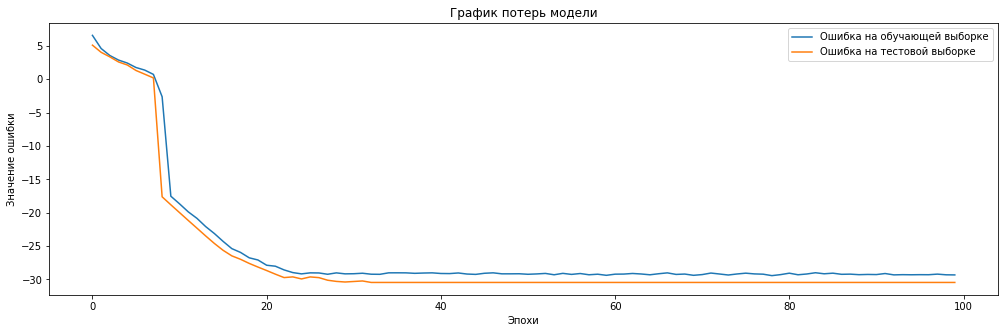

In [77]:
def model_loss_plot(model_hist):
    plt.figure(figsize = (17,5))
    plt.plot(model_hist.history['loss'],
    label = 'ошибка на обучающей выборке')
    plt.plot(model_hist.history['val_loss'],
    label = 'ошибка на тестовой выборке')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
    plt.show()
model_loss_plot(model_hist)

Зададим функцию для визуализации факт/прогноз для результатов моделей.
Посмотрим на график результата работы модели

10/10 [==============================] - 0s 2ms/step


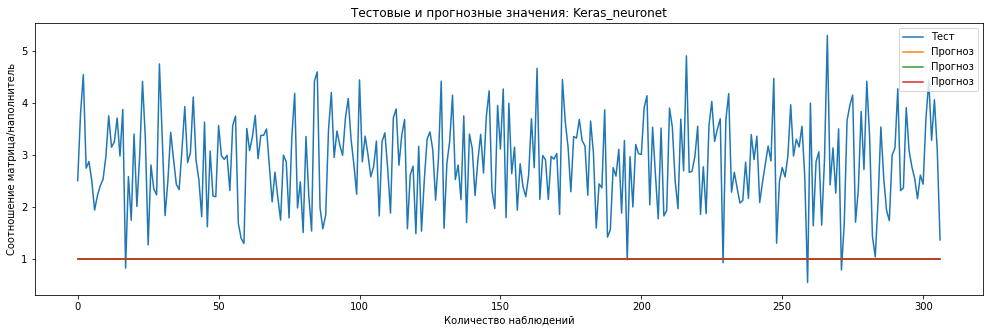

In [78]:
def actual_and_predicted_plot(orig, predict, var, model_name): 
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')

Сконфигурируем другую модель, зададим слои

In [79]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
model1 = tf.keras.Sequential([x_train_n, Dense(128, activation='relu'), 
                                         Dense(128, activation='relu'),
                                         Dense(128, activation='relu'),
                                         Dense(64, activation='relu'),
                                         Dense(64, activation='relu'),
                                         Dense(32, activation='relu'),
                                         Dense(16, activation='relu'),
                                         Dense(1)
                           ])
model1.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'mean_squared_error',
               metrics = [tf.keras.metrics.RootMeanSquaredError()]) 

Посмотрим на архитектуру модели

In [80]:
model1.summary()

Model: "sequential_196"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_497 (Dense)           (None, 128)               1792      
                                                                 
 dense_498 (Dense)           (None, 128)               16512     
                                                                 
 dense_499 (Dense)           (None, 128)               16512     
                                                                 
 dense_500 (Dense)           (None, 64)                8256      
                                                                 
 dense_501 (Dense)           (None, 64)                4160      
                                                    

Обучим модель

In [81]:
model_hist1 = model1.fit(
 x_train,
 y_train,
 epochs = 100,
 verbose = 1,
 validation_split = 0.2)

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 4.7084 - root_mean_squared_error: 2.1699 - val_loss: 1.5530 - val_root_mean_squared_error: 1.2462
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 1.3726 - root_mean_squared_error: 1.1716 - val_loss: 1.1975 - val_root_mean_squared_error: 1.0943
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 1.1206 - root_mean_squared_error: 1.0586 - val_loss: 1.1262 - val_root_mean_squared_error: 1.0612
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 1.0181 - root_mean_squared_error: 1.0090 - val_loss: 1.1202 - val_root_mean_squared_error: 1.0584
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.9184 - root_mean_squared_error: 0.9583 - val_loss: 1.1258 - val_root_mean_squared_error: 1.0611
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8703 - root_mean_squared_error: 0.9329 - val_loss: 1.0915 - val_root_

Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0111 - root_mean_squared_error: 0.1056 - val_loss: 1.5563 - val_root_mean_squared_error: 1.2475
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082 - val_loss: 1.6086 - val_root_mean_squared_error: 1.2683
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0250 - root_mean_squared_error: 0.1581 - val_loss: 1.4857 - val_root_mean_squared_error: 1.2189
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0230 - root_mean_squared_error: 0.1516 - val_loss: 1.5888 - val_root_mean_squared_error: 1.2605
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0181 - root_mean_squared_error: 0.1345 - val_loss: 1.5996 - val_root_mean_squared_error: 1.2648
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0207 - root_mean_squared_error: 0.1439 - val_loss: 1.5448 - val_

18/18 [==============================] - 0s 4ms/step - loss: 0.0145 - root_mean_squared_error: 0.1206 - val_loss: 1.5211 - val_root_mean_squared_error: 1.2333
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0219 - root_mean_squared_error: 0.1481 - val_loss: 1.5187 - val_root_mean_squared_error: 1.2324
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0235 - root_mean_squared_error: 0.1532 - val_loss: 1.5448 - val_root_mean_squared_error: 1.2429
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0255 - root_mean_squared_error: 0.1596 - val_loss: 1.4774 - val_root_mean_squared_error: 1.2155
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0256 - root_mean_squared_error: 0.1599 - val_loss: 1.5083 - val_root_mean_squared_error: 1.2281


In [82]:
model1.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.2026 - root_mean_squared_error: 1.0966


[1.202580213546753, 1.0966222286224365]

In [83]:
y_pred_model = model1.predict(x_test)
print('Model Results:')
print('Model_MAE: ', round(mean_absolute_error(y_test, y_pred_model)))
print('Model_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_model)))
print("Test score: {:.2f}".format(mean_squared_error(y_test, y_pred_model)))

10/10 [==============================] - 0s 2ms/step
Model Results:
Model_MAE:  1
Model_MAPE: 0.39
Test score: 1.20


Посмотрим на потери модели

In [84]:
model_hist1.history

{'loss': [4.70838737487793,
  1.3725513219833374,
  1.120633840560913,
  1.0180617570877075,
  0.9184222221374512,
  0.8703287243843079,
  0.8189597129821777,
  0.7819721102714539,
  0.7534851431846619,
  0.6865359544754028,
  0.6618898510932922,
  0.5739433169364929,
  0.5326547026634216,
  0.44264933466911316,
  0.35920724272727966,
  0.28647011518478394,
  0.25503942370414734,
  0.1977628767490387,
  0.14335644245147705,
  0.12234105169773102,
  0.08746815472841263,
  0.07017543911933899,
  0.05070948600769043,
  0.041103389114141464,
  0.04168443754315376,
  0.04668412357568741,
  0.06023324280977249,
  0.06809237599372864,
  0.06317123770713806,
  0.05012619495391846,
  0.03539656102657318,
  0.030919235199689865,
  0.01782645471394062,
  0.014848196879029274,
  0.010987973771989346,
  0.009205940179526806,
  0.010472253896296024,
  0.007919427007436752,
  0.006865833420306444,
  0.007544870022684336,
  0.006827241741120815,
  0.006585088558495045,
  0.006732224486768246,
  0.0092

Посмотрим на график потерь на тренировочной и тестовой выборках

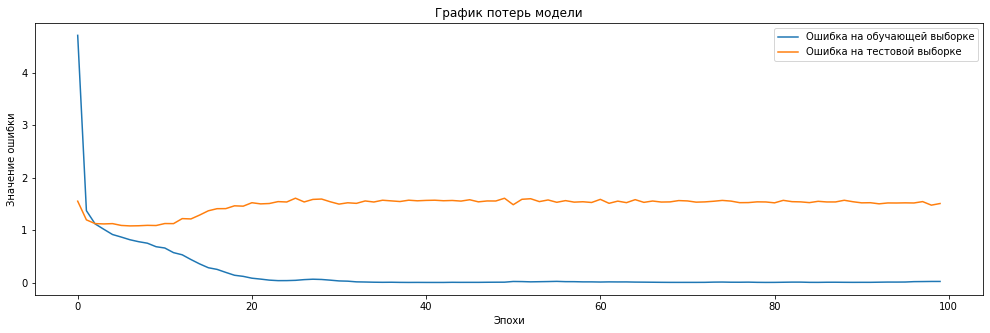

In [85]:
def model_loss_plot(model_hist1):
    plt.figure(figsize = (17,5))
    plt.plot(model_hist1.history['loss'],
    label = 'ошибка на обучающей выборке')
    plt.plot(model_hist1.history['val_loss'],
    label = 'ошибка на тестовой выборке')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
    plt.show()
model_loss_plot(model_hist1)

Зададим функцию для визуализации факт/прогноз для результатов моделей.
Посмотрим на график результата работы модели

10/10 [==============================] - 0s 2ms/step


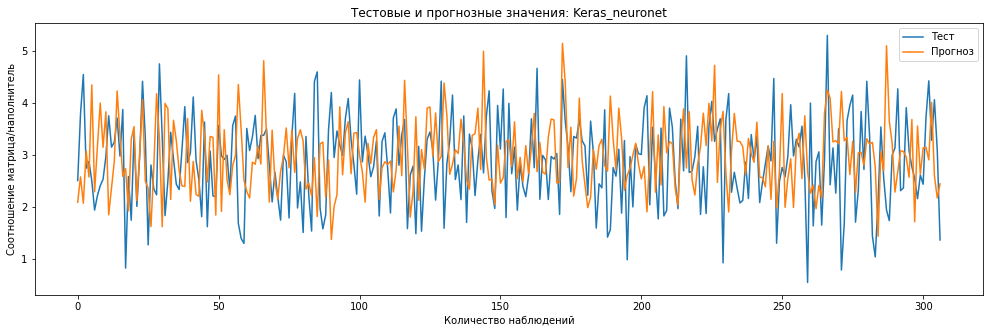

In [86]:
def actual_and_predicted_plot(orig, predict, var, model_name): 
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model1.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')

оценка модели MSE

In [87]:
model1.evaluate(x_test, y_test, verbose = 1)

10/10 [==============================] - 0s 2ms/step - loss: 1.2026 - root_mean_squared_error: 1.0966


[1.202580213546753, 1.0966222286224365]

10/10 [==============================] - 0s 2ms/step


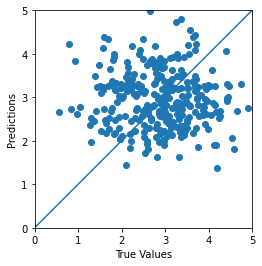

In [88]:
test_predictions = model1.predict(x_test).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Заключение.

Подводя итоги, стоит сказать, что машинное обучение в задачах моделей прогнозирования – довольно сложный процесс, требующий не только навыков программирования, но и профессионального подхода к сфере самих композитных материалов. Необходимо понимать, на какие атрибуты нужно в первую очередь обратить внимание, чтобы суметь впоследствии грамотно и чётко спрогнозировать тот или иной признак. И, естественно, обладать всеми необходимыми знаниями, умениями и навыками для прогнозов и расчетов. В ходе работы был задействован дата-сет с реальными данными, произведена его подробная опись и сопутствующий анализ; построено множество разнообразных графиков; осуществлено разбиение данных на обучающую и тестовую выборки с использованием множества вспомогательных модулей из библиотеки SkLearn, которая во многом облегчила процесс машинного обучения и в целом была очень полезным инструментом в ходе работы над выпускной квалификационной работой. В рамках машинного обучения и поиска гиперпараметров были задействованы несколько алгоритмов: линейная регрессия, градиентный бустинг, К ближайших соседей, деревья решений, стохастический градиентный спуск, многослойный перцептрон, лассо регрессия, а также опорные вектора и случайный лес. Поиск гиперпараметров осуществлялся при помощи таких методов, как «GridSearch». Для каждой из выборок были составлены классификационные отчёты, содержащие в себе основополагающие метрики, оценивающие качество проводимого обучения. В конечном итоге было представлено сравнение результатов оценок работы алгоритмов, а также различные графики и диаграммы, позволяющие наглядно оценить итоги проведенного обучения. Обучена нейронная сеть и разработано пользовательское приложение, предсказывающе вероятный прогноз по заданным параметрам. Что касается перспектив решения данной проблемы композитных материалов, то я думаю, что в таких случаях необходимо уделить больше внимания изучению самой проблемы композитных материалов, углубить знания по статистике и регрессиям, поискать иные варианты решений с данным датасетом, создать плодтворную команду программистов и сотрудников, работающих с природными материалами, способную к совместной работе над усовершенствованием уже существующих разработок и поддержанием их качественного и бесперебойного функционирования.